# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed fro 2D plotting, but around the time of 1.0 release, 3D plotting utilities were built on top of Matplotlib 2D display. For 3D plotting, we need to import `mplot3d`, which is included with the main Matplotlib installation 

In [5]:
from mpl_toolkits import mplot3d

Once imported, 3D axes can be created by passing `projection='3d'` to any normal axes creation routines.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

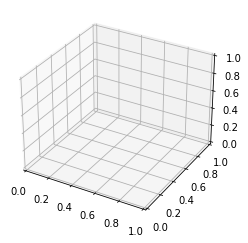

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

## Three-dimensional Points and Lines

With `ax.plot3D` and `ax.scatter3D` functions, 3D plots are possible.

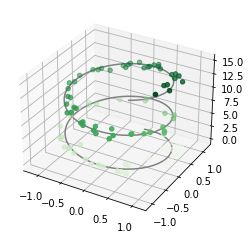

In [8]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Three-dimensional Contour Plots

As we have for plot and scatter, `ax.coutour3D` exists

In [9]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

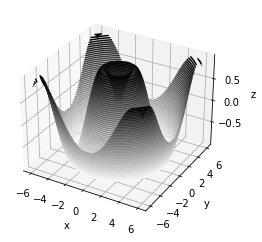

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

It can be useful to change the default view angle, which is possible with `view_init` method 

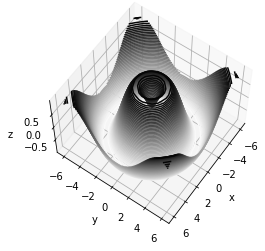

In [14]:
# 60 degrees above x-y, rotate 35 degrees counter-clockwise about z axis
ax.view_init(60, 35)
fig

## Wireframes and Surface Plots

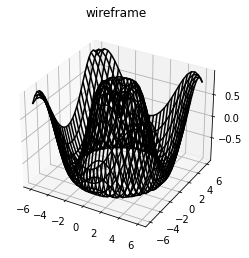

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe, but each face of the wireframe is a filled polygon

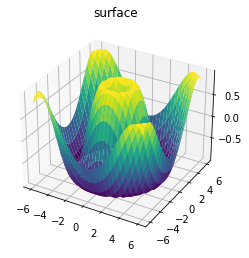

In [18]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

This is how to remove a slice, using a theta angle passed to `np.meshgrid` function

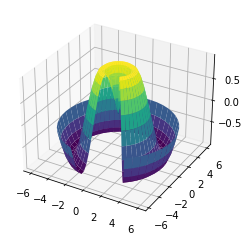

In [26]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

First, let's define points

In [27]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

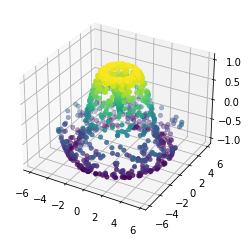

In [28]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

`ax.plot_trisurf` function create a surface by first finding a set of triangles formed between adjacent points

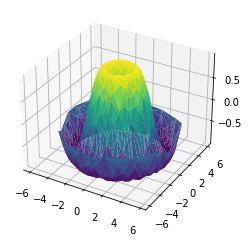

In [29]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');